# Introduction

### Table of Contents

**Introduction**

* **Part I** - Gathering Data
* **Part II** - Assessing Data
* **Part III** - Cleaning Data
* **Part IV** - Univariate Exploration
* **Part V** - Bivariate Exploration
* **Part VI** - Multivariate Exploration

# Preliminary Wrangling

# Gather

#### Import Libraries

In [1]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import glob
import os

%matplotlib inline

#### Gather data from folder

In [2]:
path = r'/Users/karandeepbhardwaj/Documents/Exploring-Lyft-s-FordGoBike-Data-from-2020/Data'

#### Find all files in the folder

In [3]:
files = glob.glob(os.path.join(path, "*.csv"))

#### Merge all the files

In [4]:
merged_df = pd.concat((pd.read_csv(f) for f in files), ignore_index = True)

In [5]:
merged_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,is_equity
0,08A4A9F7315901F3,electric_bike,2020-06-03 16:37:10,2020-06-03 16:48:28,NaN,NaN,NaN,NaN,37.770000,-122.40000,37.760000,-122.420000,casual,NaN
1,844F9D906468C441,electric_bike,2020-06-03 12:22:47,2020-06-03 12:44:02,NaN,NaN,NaN,NaN,37.780000,-122.49000,37.780000,-122.460000,casual,NaN
2,0E441BF8A86C544E,electric_bike,2020-06-02 17:37:43,2020-06-02 17:52:21,Powell St at Columbus Ave,487.0,NaN,NaN,37.800426,-122.41095,37.790000,-122.440000,casual,NaN
3,CAFE64864422F475,electric_bike,2020-06-02 18:13:01,2020-06-02 18:48:30,NaN,NaN,NaN,NaN,37.760000,-122.41000,37.770000,-122.430000,casual,NaN
4,172957A20160D568,electric_bike,2020-06-03 15:16:06,2020-06-03 16:06:10,Church St at Duboce Ave,85.0,48th Ave at Cabrillo St,521.0,37.769841,-122.42921,37.772894,-122.509079,casual,NaN


In [6]:
merged_df.to_csv('master_file.csv', index=False)

#### Test

In [7]:
df = pd.read_csv('master_file.csv')

/Users/karandeepbhardwaj/opt/anaconda3/envs/py3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
df.shape

(380678, 14)

# Assess

## Quality

* start time and end time are time stamps
* user_type and rideable_type can be set to category
* bike id, start_station_id, end_station_id can be set to numerical
* isequity not required
* extract date,day of the week,month,minute,hour from the start_time

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380678 entries, 0 to 380677
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             380678 non-null  object 
 1   rideable_type       380678 non-null  object 
 2   started_at          380678 non-null  object 
 3   ended_at            380678 non-null  object 
 4   start_station_name  239969 non-null  object 
 5   start_station_id    239969 non-null  float64
 6   end_station_name    233788 non-null  object 
 7   end_station_id      233788 non-null  float64
 8   start_lat           380678 non-null  float64
 9   start_lng           380678 non-null  float64
 10  end_lat             380036 non-null  float64
 11  end_lng             380036 non-null  float64
 12  member_casual       380678 non-null  object 
 13  is_equity           138251 non-null  object 
dtypes: float64(6), object(8)
memory usage: 40.7+ MB


In [10]:
df['member_casual'].value_counts()

casual    226098
member    154580
Name: member_casual, dtype: int64

In [11]:
df['is_equity'].value_counts()

False    129548
True       8703
Name: is_equity, dtype: int64

In [12]:
df.describe()

,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng
count,239969.000000,233788.000000,380678.000000,380678.000000,380036.000000,380036.000000
mean,225.235935,222.892082,37.722349,-122.342257,37.722295,-122.342487
std,169.505052,169.208394,0.151551,0.182445,0.151621,0.182584
min,3.000000,3.000000,37.239200,-122.514300,37.004600,-122.559000
25%,73.000000,74.000000,37.760000,-122.432100,37.760000,-122.431946
50%,172.000000,162.000000,37.773506,-122.411800,37.773500,-122.411800
75%,381.000000,381.000000,37.787500,-122.390200,37.787710,-122.390288
max,532.000000,532.000000,37.880222,-121.770000,37.962100,-121.560600


In [13]:
df.shape

(380678, 14)

# Clean

### Making a copy

In [14]:
df_clean = df.copy()

**Define**

Drop the rows with no station id

**Code**

In [15]:
#Remove rows that does not have station id
df_clean = df_clean[df_clean['start_station_id'].isnull() == False]

**Test**

In [16]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239969 entries, 2 to 380677
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             239969 non-null  object 
 1   rideable_type       239969 non-null  object 
 2   started_at          239969 non-null  object 
 3   ended_at            239969 non-null  object 
 4   start_station_name  239969 non-null  object 
 5   start_station_id    239969 non-null  float64
 6   end_station_name    194551 non-null  object 
 7   end_station_id      194551 non-null  float64
 8   start_lat           239969 non-null  float64
 9   start_lng           239969 non-null  float64
 10  end_lat             239327 non-null  float64
 11  end_lng             239327 non-null  float64
 12  member_casual       239969 non-null  object 
 13  is_equity           87315 non-null   object 
dtypes: float64(6), object(8)
memory usage: 27.5+ MB


**Define**

Convert datatype for start time and endtime

**Code**

In [17]:
df_clean['started_at'] = df_clean['started_at'].astype('datetime64[ns]')
df_clean['ended_at'] = df_clean['ended_at'].astype('datetime64[ns]')

**Test**

In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239969 entries, 2 to 380677
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             239969 non-null  object        
 1   rideable_type       239969 non-null  object        
 2   started_at          239969 non-null  datetime64[ns]
 3   ended_at            239969 non-null  datetime64[ns]
 4   start_station_name  239969 non-null  object        
 5   start_station_id    239969 non-null  float64       
 6   end_station_name    194551 non-null  object        
 7   end_station_id      194551 non-null  float64       
 8   start_lat           239969 non-null  float64       
 9   start_lng           239969 non-null  float64       
 10  end_lat             239327 non-null  float64       
 11  end_lng             239327 non-null  float64       
 12  member_casual       239969 non-null  object        
 13  is_equity           87315 non

**Define**

Drop is_equity

**Code**

In [19]:
df_clean = df_clean.drop('is_equity', 1)

**Test**

In [20]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239969 entries, 2 to 380677
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             239969 non-null  object        
 1   rideable_type       239969 non-null  object        
 2   started_at          239969 non-null  datetime64[ns]
 3   ended_at            239969 non-null  datetime64[ns]
 4   start_station_name  239969 non-null  object        
 5   start_station_id    239969 non-null  float64       
 6   end_station_name    194551 non-null  object        
 7   end_station_id      194551 non-null  float64       
 8   start_lat           239969 non-null  float64       
 9   start_lng           239969 non-null  float64       
 10  end_lat             239327 non-null  float64       
 11  end_lng             239327 non-null  float64       
 12  member_casual       239969 non-null  object        
dtypes: datetime64[ns](2), float64

**Define**

Change data type and column name of member_casual

**Code**

In [21]:
df_clean['user_type'] = df_clean['member_casual'].astype('category')

In [22]:
df_clean = df_clean.drop('member_casual', 1)

**Test**

In [23]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239969 entries, 2 to 380677
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             239969 non-null  object        
 1   rideable_type       239969 non-null  object        
 2   started_at          239969 non-null  datetime64[ns]
 3   ended_at            239969 non-null  datetime64[ns]
 4   start_station_name  239969 non-null  object        
 5   start_station_id    239969 non-null  float64       
 6   end_station_name    194551 non-null  object        
 7   end_station_id      194551 non-null  float64       
 8   start_lat           239969 non-null  float64       
 9   start_lng           239969 non-null  float64       
 10  end_lat             239327 non-null  float64       
 11  end_lng             239327 non-null  float64       
 12  user_type           239969 non-null  category      
dtypes: category(1), datetime64[ns

In [24]:
df_clean.user_type.value_counts()

casual    133456
member    106513
Name: user_type, dtype: int64

**Define**

change rideable type to catagory

**Code**

In [25]:
df_clean['bike_type'] = df_clean['rideable_type'].astype('category')

In [26]:
df_clean = df_clean.drop('rideable_type', 1)

**Test**

In [27]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239969 entries, 2 to 380677
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             239969 non-null  object        
 1   started_at          239969 non-null  datetime64[ns]
 2   ended_at            239969 non-null  datetime64[ns]
 3   start_station_name  239969 non-null  object        
 4   start_station_id    239969 non-null  float64       
 5   end_station_name    194551 non-null  object        
 6   end_station_id      194551 non-null  float64       
 7   start_lat           239969 non-null  float64       
 8   start_lng           239969 non-null  float64       
 9   end_lat             239327 non-null  float64       
 10  end_lng             239327 non-null  float64       
 11  user_type           239969 non-null  category      
 12  bike_type           239969 non-null  category      
dtypes: category(2), datetime64[ns

**Define**

extract date,day of the week,month,minute,hour from the start_time

**Code**

In [28]:
df_clean['month'] = df_clean['started_at'].dt.month
df_clean['day'] = df_clean['started_at'].dt.day
df_clean['hour'] = df_clean['started_at'].dt.hour
df_clean['week'] = df_clean['started_at'].dt.strftime('%A')
df_clean['month'] = pd.to_datetime(df_clean['month'], format='%m').dt.month_name().str.slice(stop=3)

**Test**

In [29]:
df_clean['week'].value_counts()

Saturday     43665
Sunday       39961
Friday       35146
Wednesday    31303
Tuesday      31161
Thursday     29564
Monday       29169
Name: week, dtype: int64

In [30]:
df_clean['hour'].value_counts()

17    24588
16    22443
18    21705
15    21238
14    20256
13    18926
12    17344
19    16544
11    13924
10    10743
20     9315
9      9180
8      8060
7      6299
21     5124
6      3479
22     3390
23     2224
0      1313
5      1138
1       843
4       707
2       646
3       540
Name: hour, dtype: int64

In [31]:
df_clean['month'].value_counts()

Jun    99220
May    87315
Apr    53434
Name: month, dtype: int64

In [32]:
df_clean['day'].value_counts()

25    10571
24     9878
3      9697
23     9056
19     8946
30     8766
26     8561
16     8426
18     8236
28     8137
27     8082
17     8017
13     7930
22     7832
7      7829
20     7820
9      7774
21     7631
10     7597
29     7503
2      7470
14     7348
6      7305
15     7186
12     7068
8      6862
1      6843
11     6211
5      6190
4      5483
31     3714
Name: day, dtype: int64

In [33]:
df_clean.sample(3)

,ride_id,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,bike_type,month,day,hour,week
379013,630DABB5D0E8EF70,2020-04-20 18:24:36,2020-04-20 18:35:09,Steiner St at California St,480.0,Eureka Valley Recreation Center,118.0,37.788600,-122.435400,37.7593,-122.4369,member,electric_bike,Apr,20,18,Monday
283649,8E1AD5890CAE3C37,2020-05-06 18:10:28,2020-05-06 18:31:55,Duboce Park,84.0,Townsend St at 7th St,90.0,37.769200,-122.434100,37.7711,-122.4026,casual,electric_bike,May,6,18,Wednesday
127932,871FB78A5DC3C772,2020-06-19 14:56:10,2020-06-19 15:37:33,Folsom St at 7th St,493.0,NaN,NaN,37.776547,-122.408016,37.7700,-122.4700,member,electric_bike,Jun,19,14,Friday


**Define**

Extract duration of trip from start time and end time

**Code**

In [34]:
df_clean['duration'] = df_clean['ended_at'] - df_clean['started_at']
df_clean['duration']

2        00:14:38
4        00:50:04
8        00:22:57
10       00:16:30
14       00:27:42
           ...   
380670   00:08:35
380671   00:13:00
380672   00:11:56
380673   00:12:49
380677   00:10:43
Name: duration, Length: 239969, dtype: timedelta64[ns]

**Test**

In [35]:
df_clean['duration'].shape[0]

239969

In [36]:
df_clean = df_clean[df_clean['duration'].notna()]

In [37]:
df_clean['duration']= df_clean['duration']/np.timedelta64(1,'m')

In [38]:
df_clean.head()

,ride_id,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,bike_type,month,day,hour,week,duration
2,0E441BF8A86C544E,2020-06-02 17:37:43,2020-06-02 17:52:21,Powell St at Columbus Ave,487.0,NaN,NaN,37.800426,-122.410950,37.790000,-122.440000,casual,electric_bike,Jun,2,17,Tuesday,14.633333
4,172957A20160D568,2020-06-03 15:16:06,2020-06-03 16:06:10,Church St at Duboce Ave,85.0,48th Ave at Cabrillo St,521.0,37.769841,-122.429210,37.772894,-122.509079,casual,electric_bike,Jun,3,15,Wednesday,50.066667
8,AC29BDD9051D1827,2020-06-03 12:13:30,2020-06-03 12:36:27,Cesar Chavez St at Dolores St,140.0,4th St at 16th St,104.0,37.747758,-122.425121,37.767008,-122.390851,casual,electric_bike,Jun,3,12,Wednesday,22.950000
10,BE55928B0B2837A6,2020-06-03 14:50:30,2020-06-03 15:07:00,Yerba Buena Center for the Arts (Howard St at ...,284.0,NaN,NaN,37.784577,-122.400985,37.760000,-122.420000,casual,electric_bike,Jun,3,14,Wednesday,16.500000
14,7E0C4C5917A9EEC2,2020-06-02 19:18:23,2020-06-02 19:46:05,The Embarcadero at Vallejo St,8.0,Hyde St at Post St,369.0,37.799943,-122.398562,37.787527,-122.416830,casual,electric_bike,Jun,2,19,Tuesday,27.700000


**Define**

Convert longitude lattitude into kms

* Calculations are derived from the 'haversine' formula which is used to calculate the great-circle distance between tow points, i.e. the shortest distance over the earth's surface. Thank you Google for providing a way to figure this out! Reference is listed in the sources at the end of this document.

**Code**

In [39]:
import math
from math import radians, sin, cos, acos

def distance(origin, destination):

    lat1, long1 = origin
    lat2, long2 = destination
    radius = 6371
    # this is in kilometers - will convert to US units of miles after

    dlat = math.radians(lat2 - lat1)
    dlong = math.radians(long2 - long1)
    
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlong / 2) * math.sin(dlong / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [40]:
df_clean['distance'] = df_clean.apply(lambda x: distance((x['start_lat'], x['start_lng']), (x['end_lat'], x['end_lng'])), axis=1)

**Test**

In [41]:
df_clean.sample(3)

,ride_id,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,bike_type,month,day,hour,week,duration,distance
189117,7D4D3888C6C7DC07,2020-05-24 13:30:15,2020-05-24 13:36:25,14th Ave at Geary Blvd,474.0,23rd Ave at Clement St,520.0,37.780500,-122.47280,37.782000,-122.48280,member,docked_bike,May,24,13,Sunday,6.166667,0.894523
83598,57CF5D6B1FD57CDE,2020-06-11 20:27:22,2020-06-11 20:50:09,San Fernando St at 4th St,310.0,San Fernando St at 4th St,310.0,37.335885,-121.88566,37.335885,-121.88566,casual,docked_bike,Jun,11,20,Thursday,22.783333,0.000000
356382,EFD21DBBBDCC5F91,2020-04-17 15:04:40,2020-04-17 15:30:23,St. Joseph's Ave at Geary Blvd,508.0,Washington St at Kearny St,10.0,37.782500,-122.44250,37.795400,-122.40480,member,docked_bike,Apr,17,15,Friday,25.716667,3.610071


In [42]:
df_clean = df_clean.drop('start_lat', 1)
df_clean = df_clean.drop('start_lng', 1)
df_clean = df_clean.drop('end_lat', 1)
df_clean = df_clean.drop('end_lng', 1)
df_clean.sample(3)

,ride_id,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,user_type,bike_type,month,day,hour,week,duration,distance
194537,6B562452EEDA62E2,2020-05-31 11:51:50,2020-05-31 11:58:48,Dolores St at 15th St,96.0,Valencia St at 21st St,127.0,casual,docked_bike,May,31,11,Sunday,6.966667,1.165426
177807,01163A91C851466F,2020-05-16 13:26:59,2020-05-16 14:00:36,Parker St at Fulton St,266.0,Parker St at Fulton St,266.0,member,docked_bike,May,16,13,Saturday,33.616667,0.000000
93418,6A3690E54C9B56F8,2020-06-06 12:20:09,2020-06-06 12:46:59,Lane St at Revere Ave,362.0,Garfield Square (25th St at Harrison St),139.0,casual,docked_bike,Jun,6,12,Saturday,26.833333,2.879463


In [43]:
df_clean.isna().sum()

ride_id                   0
started_at                0
ended_at                  0
start_station_name        0
start_station_id          0
end_station_name      45418
end_station_id        45418
user_type                 0
bike_type                 0
month                     0
day                       0
hour                      0
week                      0
duration                  0
distance                642
dtype: int64

In [44]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239969 entries, 2 to 380677
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             239969 non-null  object        
 1   started_at          239969 non-null  datetime64[ns]
 2   ended_at            239969 non-null  datetime64[ns]
 3   start_station_name  239969 non-null  object        
 4   start_station_id    239969 non-null  float64       
 5   end_station_name    194551 non-null  object        
 6   end_station_id      194551 non-null  float64       
 7   user_type           239969 non-null  category      
 8   bike_type           239969 non-null  category      
 9   month               239969 non-null  object        
 10  day                 239969 non-null  int64         
 11  hour                239969 non-null  int64         
 12  week                239969 non-null  object        
 13  duration            239969 no

#### What is the structure of your dataset?

ride_id      
started_at
ended_at
start_station_name       
start_station_id     
end_station_name      
end_station_id      
user_type     
bike_type     
month       
day      
hour       
week       
duration     
distance   

### Added variables:

* duration: start/end time, how long the trip took in seconds
* Distance in kms
* Day, month, hour of ride


#### What is/are the main feature(s) of interest in your dataset?

The main features od dataset is when and where bikes are high in demand (during the day/weekday/month). 

#### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

`Features:`

user_type     
bike_type     
month       
day      
hour       
week       
duration     
distance   

Will help me support the investigation.

**Convert to csv**

In [45]:
df_clean.to_csv('final_data.csv',index=None)

In [46]:
df_final = pd.read_csv('final_data.csv')
df_final.head()

,ride_id,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,user_type,bike_type,month,day,hour,week,duration,distance
0,0E441BF8A86C544E,2020-06-02 17:37:43,2020-06-02 17:52:21,Powell St at Columbus Ave,487.0,NaN,NaN,casual,electric_bike,Jun,2,17,Tuesday,14.633333,2.803461
1,172957A20160D568,2020-06-03 15:16:06,2020-06-03 16:06:10,Church St at Duboce Ave,85.0,48th Ave at Cabrillo St,521.0,casual,electric_bike,Jun,3,15,Wednesday,50.066667,7.028324
2,AC29BDD9051D1827,2020-06-03 12:13:30,2020-06-03 12:36:27,Cesar Chavez St at Dolores St,140.0,4th St at 16th St,104.0,casual,electric_bike,Jun,3,12,Wednesday,22.950000,3.695719
3,BE55928B0B2837A6,2020-06-03 14:50:30,2020-06-03 15:07:00,Yerba Buena Center for the Arts (Howard St at ...,284.0,NaN,NaN,casual,electric_bike,Jun,3,14,Wednesday,16.500000,3.203368
4,7E0C4C5917A9EEC2,2020-06-02 19:18:23,2020-06-02 19:46:05,The Embarcadero at Vallejo St,8.0,Hyde St at Post St,369.0,casual,electric_bike,Jun,2,19,Tuesday,27.700000,2.117242


# Data Exploration and Analysis

## Univariate Exploration

## What is the average duration for bike is driven by a user ?

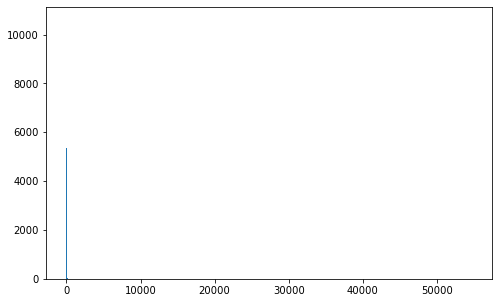

In [47]:
plt.figure(figsize=[8, 5])
bins_ = np.arange(0, df_final['duration'].max()+1, 1)
plt.hist(data = df_final, x = 'duration', bins=bins_);

### Something is not right, the distribution is not normal and there are too many outliners.

In [48]:
df_final['duration'].describe()

count    239969.000000
mean         35.778007
std         484.281482
min         -14.050000
25%           7.733333
50%          14.116667
75%          26.350000
max       54728.866667
Name: duration, dtype: float64

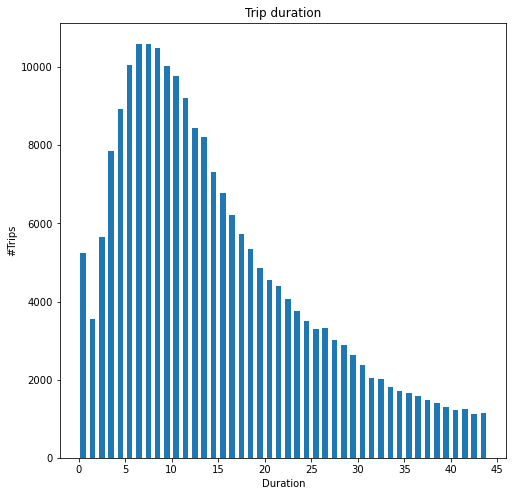

In [49]:
plt.figure(figsize=[8, 8])
plt.hist(data = df_final, x = 'duration', bins = (np.arange(0, 45, 1)), rwidth = 0.6);
plt.title("Trip duration")
plt.xlabel('Duration')
plt.xticks([0, 5, 10, 15, 20, 25, 30,  35, 40, 45], ['{}'.format(val) for val in [0, 5, 10, 15, 20, 25, 30,  35, 40, 45]])
plt.ylabel('#Trips');

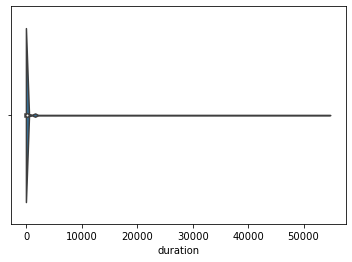

In [50]:
sns.violinplot(data = df_final, x = 'duration');

### Lets remove the outliners since from above can be seen it doesnt contribute to hypothesis much.

In [51]:
# Drop record duration_min < 100 min and > 0
df_final = df_final[(df_final['duration'] <= 100) & (df_final.duration > 0)]
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233481 entries, 0 to 239968
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             233481 non-null  object 
 1   started_at          233481 non-null  object 
 2   ended_at            233481 non-null  object 
 3   start_station_name  233481 non-null  object 
 4   start_station_id    233481 non-null  float64
 5   end_station_name    189471 non-null  object 
 6   end_station_id      189471 non-null  float64
 7   user_type           233481 non-null  object 
 8   bike_type           233481 non-null  object 
 9   month               233481 non-null  object 
 10  day                 233481 non-null  int64  
 11  hour                233481 non-null  int64  
 12  week                233481 non-null  object 
 13  duration            233481 non-null  float64
 14  distance            233352 non-null  float64
dtypes: float64(4), int64(2), object(9)

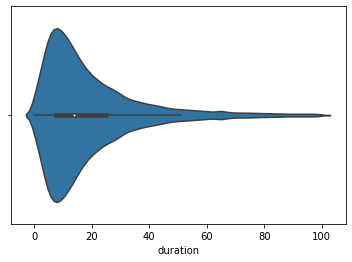

In [52]:
sns.violinplot(data = df_final, x = 'duration');

### The above analysis conveys that Users tend to use bikes for shorther duration.

The riders only use bike for shorter duration of time which is apporximatly 5-10 minutes.

## Lets look at member's distance

In [53]:
df_final['distance'].describe()

count    233352.000000
mean          1.954468
std           1.613018
min           0.000000
25%           0.758072
50%           1.625733
75%           2.826926
max          22.319872
Name: distance, dtype: float64

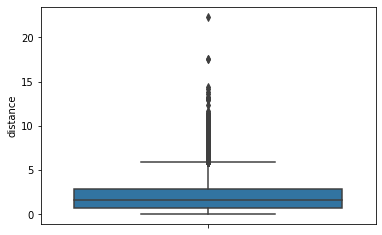

In [54]:
sns.boxplot(data = df_final, y = 'distance');

### Since the data is not normally distributed, Lets remove outliners

In [55]:
df_final = df_final[(df_final['distance'] <= 8) & (df_final['distance'] >= 1)]

In [56]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158533 entries, 0 to 239968
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             158533 non-null  object 
 1   started_at          158533 non-null  object 
 2   ended_at            158533 non-null  object 
 3   start_station_name  158533 non-null  object 
 4   start_station_id    158533 non-null  float64
 5   end_station_name    124518 non-null  object 
 6   end_station_id      124518 non-null  float64
 7   user_type           158533 non-null  object 
 8   bike_type           158533 non-null  object 
 9   month               158533 non-null  object 
 10  day                 158533 non-null  int64  
 11  hour                158533 non-null  int64  
 12  week                158533 non-null  object 
 13  duration            158533 non-null  float64
 14  distance            158533 non-null  float64
dtypes: float64(4), int64(2), object(9)

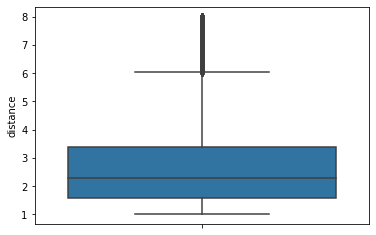

In [57]:
sns.boxplot(data = df_final, y = 'distance');

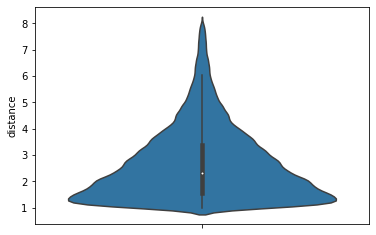

In [58]:
sns.violinplot(data = df_final, y = 'distance');

### Above can be seen that after removing outliners the graph is much more normally distributed.

* From above graph , it can be noted that people tend to use bikes for shorter distance with average around 2-3 kms. 

### What is the distribution of the number of trips by the `hour` of a day?

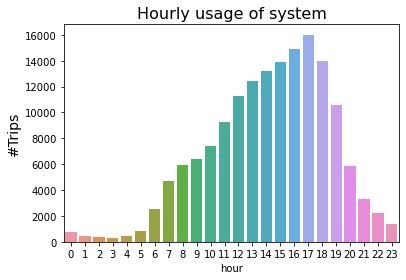

In [59]:
sns.countplot(data = df_final, x = 'hour');
plt.ylabel('#Trips', fontsize=14)
plt.title("Hourly usage of system", fontsize=16);

#### Above distribution shows that 

* 12 pm - 6pm are peak times and 12am- 4am and 22-23 pm are least busy hours.

## What is bike usage monthly ?

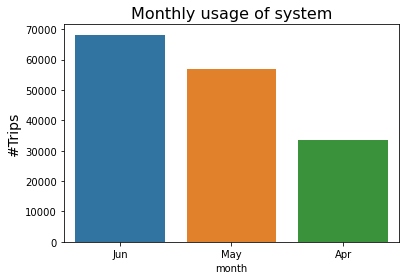

In [60]:
sns.countplot(data = df_final, x = 'month');
plt.ylabel('#Trips', fontsize=14)
plt.title("Monthly usage of system", fontsize=16);

#### Above anaylsis shows that 
* June month has most bikers.
* April month has lowest bikers.
* Due to businesses and places repoening after lockdown, people tend to use more and more bikes.

## What kind of bikes are mostly used?

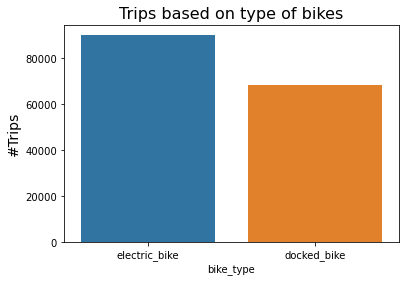

In [61]:
sns.countplot(data = df_final, x = 'bike_type');
plt.ylabel('#Trips', fontsize=14)
plt.title("Trips based on type of bikes", fontsize=16);

#### Electric bike is the most used bike by the riders.

* This conveys that altough people use shorter period of time and shorter distance, which fits perfect with electric bike situation as it takes less time than riding docked bike to travel.

## Riders who use the bike, Do they have subscription ?

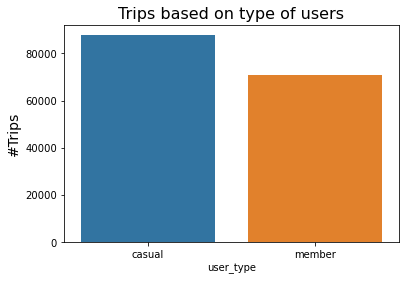

In [62]:
sns.countplot(data = df_final, x = 'user_type');
plt.ylabel('#Trips', fontsize=14)
plt.title("Trips based on type of users", fontsize=16);

#### It is very intersting to not that although it is very difficult in these times of pandamic for tourists to arrive, since tourists tend to use daily subscription rather than becoming a member, most of the riders are casuals.

* It can be because the chrge for daily is less than monthly subscription.

## What is weekly report for trips?

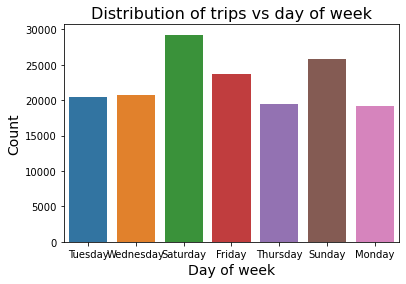

In [63]:
sns.countplot(data=df_final, x='week')
plt.xlabel('Day of week', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Distribution of trips vs day of week", fontsize=16);

#### Sarturday and Sunday has most visitors, may be because people work from home on weekdays and go out on weekends

##### Insights from univariate data exploration

* Saturday and sunday are the most busy days.
* Riders typically use the system doe shorter duration of time and for shorter distance, which may be a commute to go to nearest park or commute service.
* Average distance travlled by users is around 2-3 kms. which proves the analysis for shorter duration of time spend on bikes.
* Intersting to know that majority of riders are not members, instead are casuals.
* Majority of riders tend to use the Electric bike for commute since it is quicker and easier to commute with.

#### The features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

* The data conveys that bikes are not used during weekdays and not even during peak hours. This affect is may be due to Corona Virus. People tend to go out on weekends instead of weekdays.

* Electric bikes are used instead of docked bikes, which is intersting and alos fits with fact that average duration per ride is almost 5-10 minutes, since electric bikes takes less time.

# Bivariate Exploration

In [64]:
df_final.user_type.value_counts()

casual    87609
member    70924
Name: user_type, dtype: int64

# Members Vs Casuals

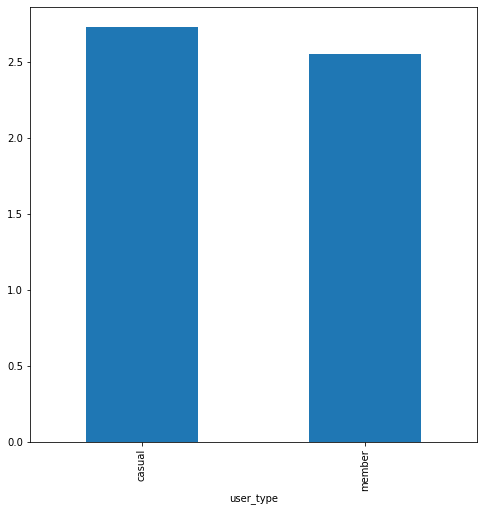

In [65]:
plt = df_final.groupby('user_type')['distance'].mean()
plt.plot(kind='bar', figsize=(8,8));

#### Casual bikers travel more distance than members.

### Monhtly comapison of Casual and Member types

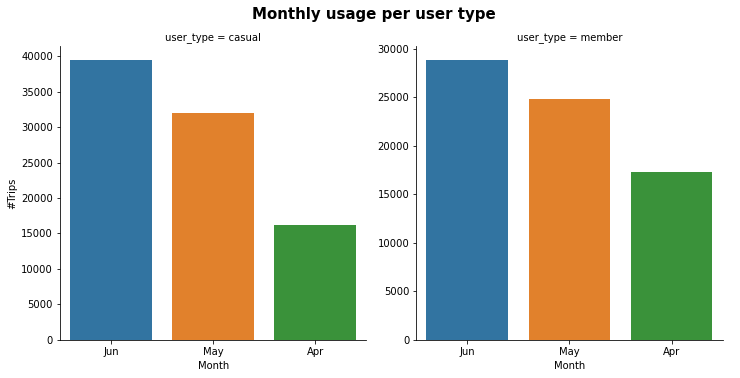

In [66]:
g = sns.catplot(data=df_final, x='month', col="user_type", kind='count', sharey = False)
g.set_axis_labels("Month", "#Trips")
g.add_legend()
g.fig.suptitle('Monthly usage per user type', y=1.04, fontsize=15, fontweight='bold');

### As can be seen from above Members and Casuals graph is almost same, which means similar pattern in use of bikes in both cases, with siggnificant difference in one month of April. April has lower number in both cases but even lower in case of casual member type. 

#### This can be due to sudden lockdown effects on tourism due to corona virus, lesser people travlled using bikes, but with the reporning there can be seen an increase in the graph.

### User type hourly usage

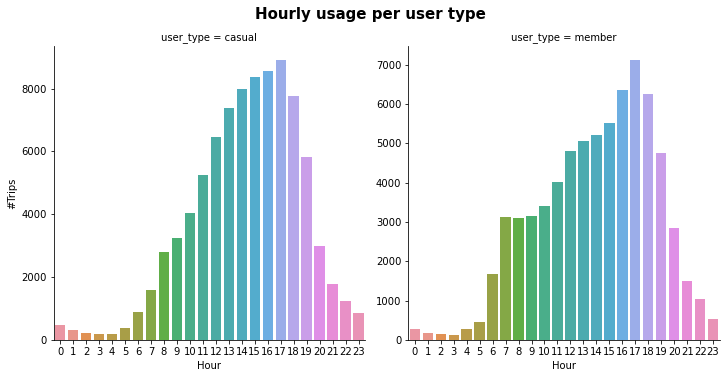

In [67]:
g = sns.catplot(data=df_final, x='hour', col="user_type", kind='count', sharey = False)
g.set_axis_labels("Hour", "#Trips")
g.fig.suptitle('Hourly usage per user type', y=1.04, fontsize=15, fontweight='bold');

#### The two user types almost use the bike at similar times, but with a little change in case of member type.

### Hourly usage based on bike types.

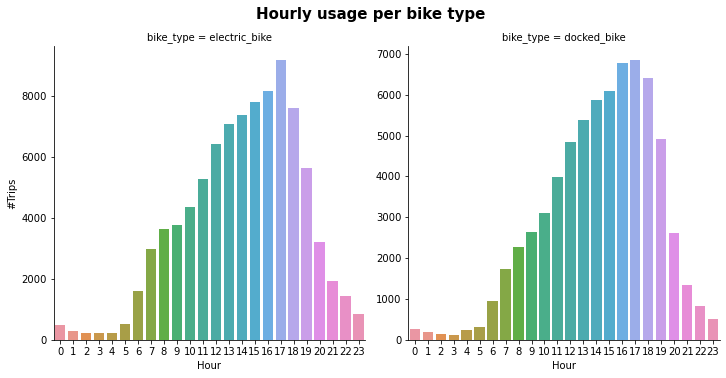

In [68]:
g = sns.catplot(data=df_final, x='hour', col="bike_type", kind='count', sharey = False)
g.set_axis_labels("Hour", "#Trips")
g.fig.suptitle('Hourly usage per bike type', y=1.04, fontsize=15, fontweight='bold');

* There is not much siggnificant difference among these two comparisons , but electric bikes being a little higher than docked bikes, may be due to ease of commute and less effort involved.

### Monthly bike usage based on bike type

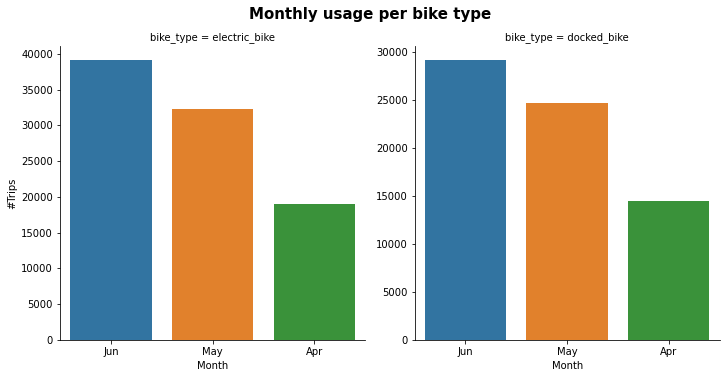

In [69]:
g = sns.catplot(data=df_final, x='month', col="bike_type", kind='count', sharey = False)
g.set_axis_labels("Month", "#Trips")
g.fig.suptitle('Monthly usage per bike type', y=1.04, fontsize=15, fontweight='bold');

* These comparisons are almost identical with a slightly large use of rides using electric bikes in almost every month.

* The lineraity and use is directly proportional to the monthly usage of user type which we will see below in multi visualization.

### Trip duration for user type

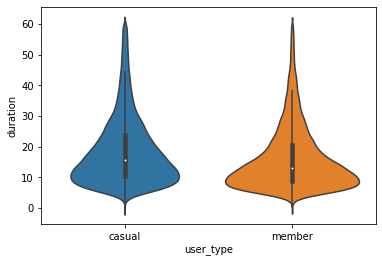

In [70]:
# User Type and Duration
sns.violinplot(data=df_final[(df_final.duration<=60)&(df_final.duration>=0)], x='user_type',y='duration');

#### Above graph conveys that max users are not members of the ford bike.

## Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The data helps to support the conclusion that people tend to use more bikes with coming months due to repoening of places which were shut down due to pandamic and more use of electric bikes can be seen.

## Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

* The data helps to support the conclusion that people tend to use more bikes with coming months due to repoening of places which were shut down due to pandamic and more use of electric bikes can be seen

* There is a difference in the trip duration between Casuals and Memebers. Casual trips longer than for members, due to reason that they prefer bike rides around weekends in summer, which may be for longer trips.

# Multivariate Exploration

In [71]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158533 entries, 0 to 239968
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             158533 non-null  object 
 1   started_at          158533 non-null  object 
 2   ended_at            158533 non-null  object 
 3   start_station_name  158533 non-null  object 
 4   start_station_id    158533 non-null  float64
 5   end_station_name    124518 non-null  object 
 6   end_station_id      124518 non-null  float64
 7   user_type           158533 non-null  object 
 8   bike_type           158533 non-null  object 
 9   month               158533 non-null  object 
 10  day                 158533 non-null  int64  
 11  hour                158533 non-null  int64  
 12  week                158533 non-null  object 
 13  duration            158533 non-null  float64
 14  distance            158533 non-null  float64
dtypes: float64(4), int64(2), object(9)

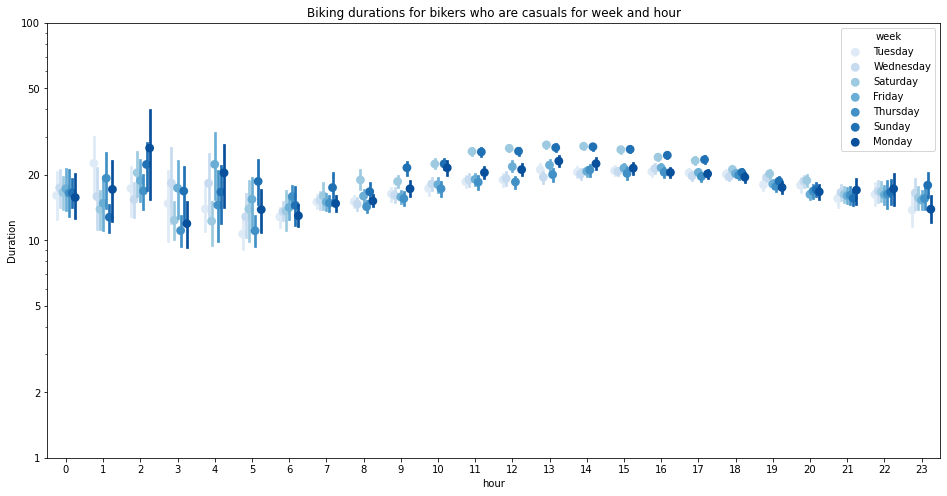

In [72]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = [16,8])

ax = sns.pointplot(data = df_final[df_final['user_type'] == 'casual'], x = 'hour', y = 'duration', hue = 'week',
           palette = 'Blues', linestyles = '', dodge = 0.5);

plt.title('Biking durations for bikers who are casuals for week and hour');
plt.ylabel('Duration');
plt.yscale('log');
a = [1, 2, 5, 10, 20, 50, 100]
b = [1, 2, 5, 10, 20, 50, 100]
plt.yticks(a,b);
ax.set_yticklabels([],minor = True);

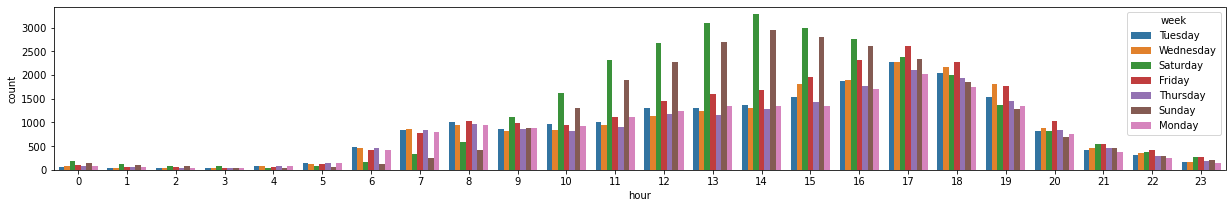

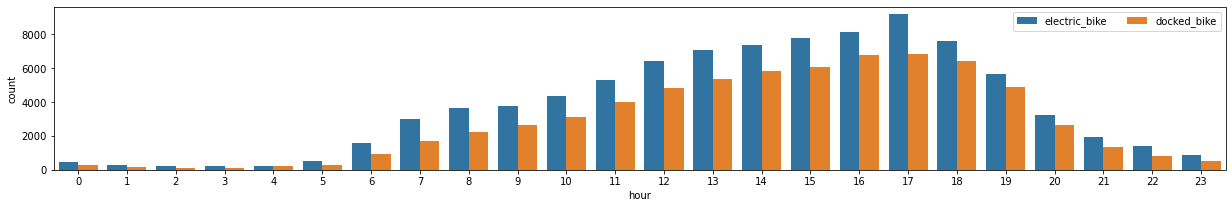

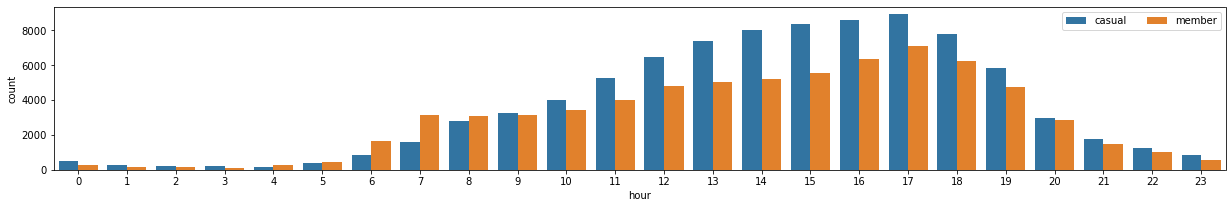

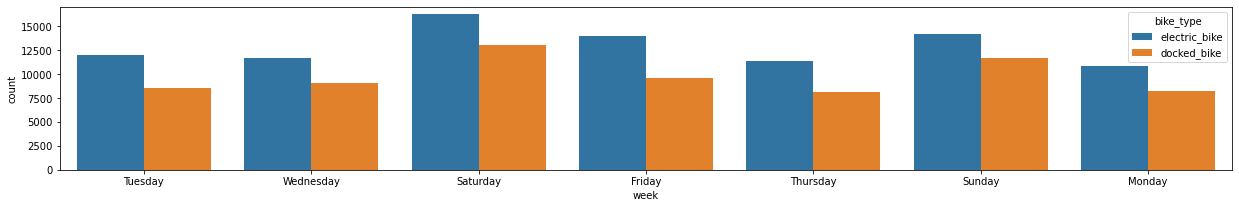

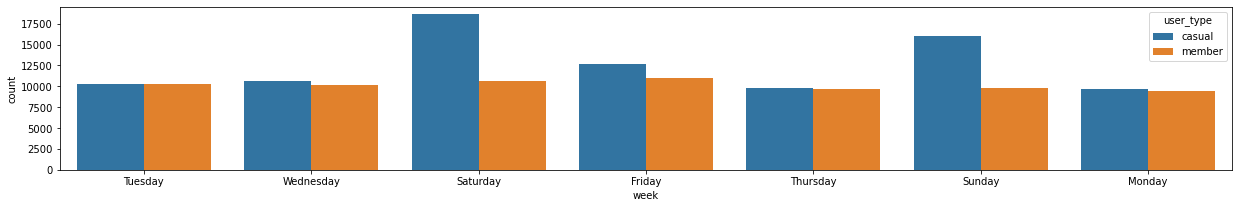

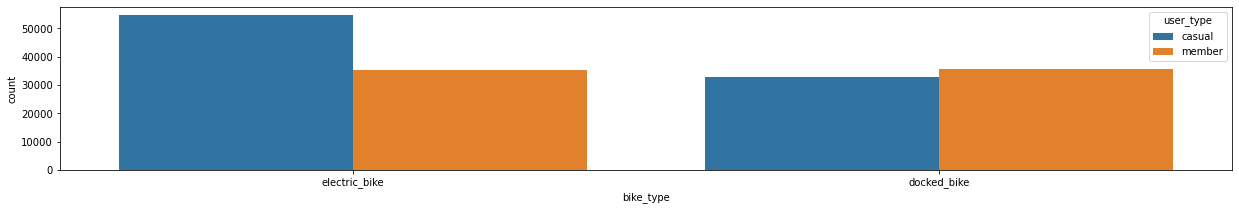

In [73]:
plt.figure(figsize = [21, 21]);
plt.subplot(6, 1, 1);
sns.countplot(data = df_final, x = 'hour', hue = 'week');

plt.figure(figsize = [21, 21]);
ax = plt.subplot(6, 1, 2);
sns.countplot(data = df_final, x = 'hour', hue = 'bike_type');
ax.legend(ncol = 2); 

plt.figure(figsize = [21, 21]);
ax = plt.subplot(6, 1, 3);
sns.countplot(data = df_final, x = 'hour', hue = 'user_type');
ax.legend(loc = 1, ncol = 2);

plt.figure(figsize = [21, 21]);
ax = plt.subplot(6, 1, 4);
sns.countplot(data = df_final, x = 'week', hue = 'bike_type');

plt.figure(figsize = [21, 21]);
ax = plt.subplot(6, 1, 5);
sns.countplot(data = df_final, x = 'week', hue = 'user_type');

plt.figure(figsize = [21, 21]);
ax = plt.subplot(6, 1, 6);
sns.countplot(data = df_final, x = 'bike_type', hue = 'user_type');

## Any relation among user type and duration ?

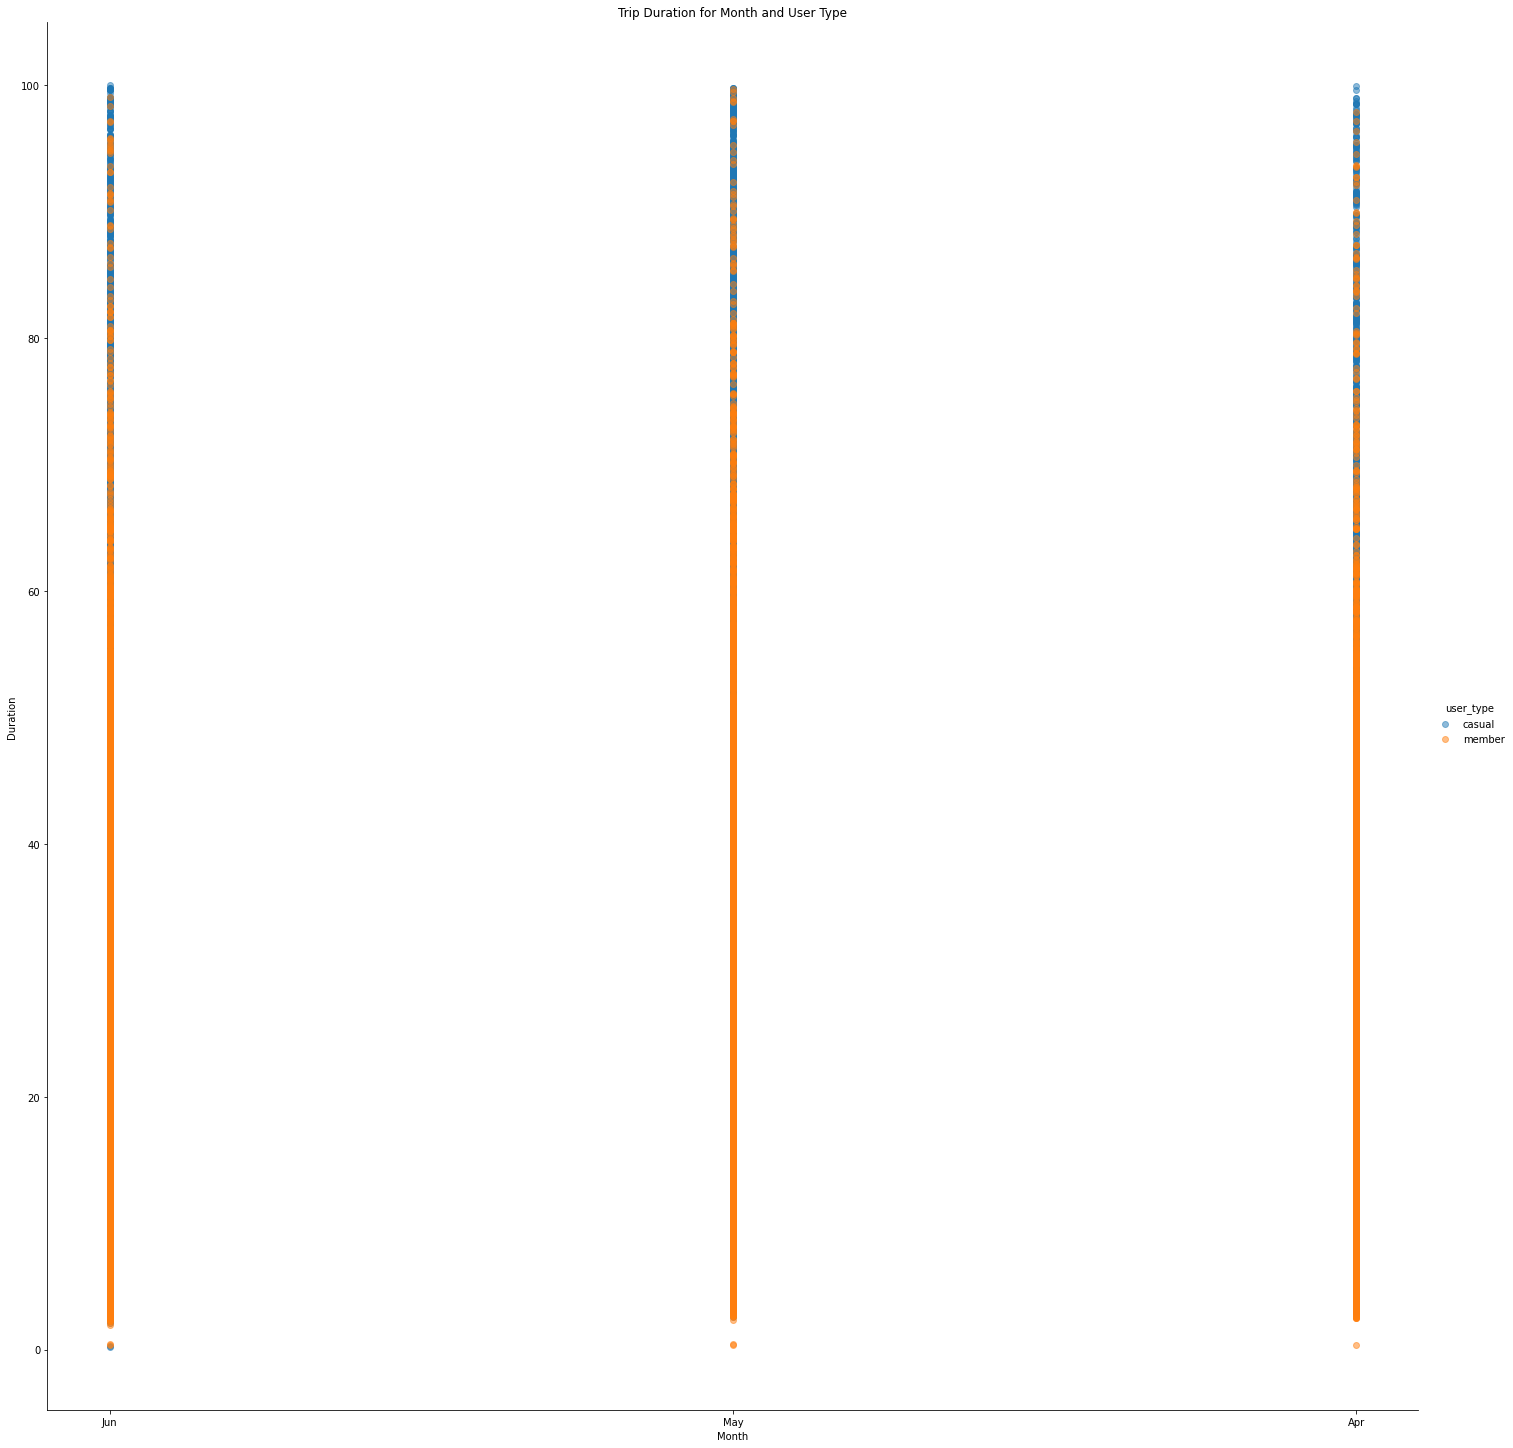

In [79]:
g = sns.FacetGrid(data =  df_final, hue = 'user_type', height = 20)
g.map(plt.scatter, 'month','duration', alpha = 0.5)
g.add_legend()
plt.title('Trip Duration for Month and User Type')
plt.xlabel('Month')
plt.ylabel('Duration');

#### Quite intresting to see how user type is associated with the duration spent on ride. However more casual users are taking shorter to longer trips during month of April.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
These findings convey so much pattern in the data. The relationship among duration, distance and bike type is positive. The main feature which helped this finding was distance travlled, which helped learning the pattern of users using the bike.

### Were there any interesting or surprising interactions between features?
The Members mostly use electric bike as compared to docked bikes and casual riders rarely use docked bike, this the reason because riders want to experince electric bikes due to ease of commute, this feature was interesting for me.

# Conclusions

* The data is pretty straight forward but some attributes work together to display a very conveying and intresting pattern in data and to learn the aspacts of business of Ford bike. I will list some of them below:

    1. Among casual and members of the system, casual bikers tend to drive for more duration than the members, which conveys 2 things, either the every day charge is less than membership or number of tourists are more than the people living in the city.

    2. Due the pandamic, most peak and busy hours/days are weekends during evening time. As most people work from home during week days. People tend to go out only on weekends for a short drive and short duration of time.

    3. During weekdays only evening hours are busy which shows people use ford bike as their commute to go to park or near by places.

    4. As the Data is limited to months of summer an increase in daily riders can be seen with the further months, which conveys that tourists places are opening, due which more and more tourists are coming and people are going out using the commute.
    
    5. Riders tend to use electric bike more than the docked bikes, amy be due to save time and effort as in order to spend lesser time outside the home, due to pandamic.